# Python初級編：乱数の生成と利用

このノートブックでは，グラフ描画の基本と，乱数を利用したプログラミングの練習を行う．

<!--
## 今日の内容
* [乱数の生成](#乱数の生成)
  * [ランダムな整数](#ランダムな整数の生成)
  * [ランダムな実数（浮動小数点数）](#ランダムな実数（浮動小数点数）の生成)
  * [一様でない整数乱数の生成](#一様でない整数乱数の生成)
* [演習課題1：同じ誕生日のクラスメイト](#演習課題1：同じ誕生日のクラスメイトが存在する確率)
* [演習課題2：モンティ・ホール問題](#演習課題2：モンティ・ホール問題)
* [エクストラ課題：人工無脳にしゃべらせる](#エクストラ課題（時間が余った人用）：人工無脳にしゃべらせる)
-->
## 目次
* [グラフ描画の基本](#グラフ描画の基本)
 * [ヒストグラム（`plt.hist`）](#ヒストグラム（`plt.hist`）)
 * [ミニ練習](#ミニ練習)
 * [散布図（`plt.scatter`）](#散布図（`plt.scatter`）)
 * [ミニ練習](#ミニ練習)
 * [関数のグラフの表示（`plt.plot`）](#関数のグラフの表示（`plt.plot`）)
* [乱数の生成](#乱数の生成)
 * [ランダムな整数の生成](#ランダムな整数の生成)
 * [ランダムな実数（浮動小数点数）の生成](#ランダムな実数（浮動小数点数）の生成)
 * [練習7.1：大数の法則](#練習7.1：大数の法則)
 * [練習7.2：乱数の最大値の分布](#練習7.2：乱数の最大値の分布)
 * [練習7.3：実数乱数の組のプロット](#練習7.3：実数乱数の組のプロット)
 * [練習7.4：円周率の近似値](#練習7.4：円周率の近似値)
* [練習7.5：同じ誕生日のクラスメイトが存在する確率](#練習7.5：同じ誕生日のクラスメイトが存在する確率)
* [課題提出の前の注意](#課題提出の前の注意)
* [チャレンジ課題7.6：モンティ・ホール問題](#チャレンジ課題7.6：モンティ・ホール問題)
* [チャレンジ課題7.7：人工無脳にしゃべらせる](#チャレンジ課題7.7：人工無脳にしゃべらせる)
 * [一様でない整数乱数の生成](#一様でない整数乱数の生成)
 * [確率に従った単語列の生成](#確率に従った単語列の生成)
* [チャレンジ課題7.8: 超球の体積を求める](#チャレンジ課題7.8:-超球の体積を求める)
 * [1. 乱数を使って体積の近似値を求める](#1.-乱数を使って体積の近似値を求める)
 * [2. 乱数を使わずに体積の近似値を求める](#2.-乱数を使わずに体積の近似値を求める)
  * [格子点の生成](#格子点の生成)
  * [格子点の数による超球の体積の近似](#格子点の数による超球の体積の近似)
 * [3. 正確な超球の体積](#3.-正確な超球の体積)
 * [4. 手法の比較](#4.-手法の比較)
* [課題提出の前の注意](#課題提出の前の注意)


## グラフ描画の基本
ヒストグラム，散布図，および関数のグラフの描画の方法について練習する．

まず以下のセルを実行して，グラフ描画のためのライブラリを読み込みなさい．

In [1]:
import matplotlib.pyplot as plt

上のセルの内容について簡単に説明しておく：
* 上のセルの `import ...` は `...` というライブラリを読み込みなさいという命令．
* `matplotlib.pyplot` は様々な機能をもったグラフ描画のためのライブラリ．
* `... as plt` は，これから `matplotlib.pyplot` の中の関数を使うときは `plt.` を関数名の先頭に付けて呼び出します，という宣言．例えばこの後で使うヒストグラムを描く関数は `plt.hist` という名前で呼ぶことになる．

### ヒストグラム（`plt.hist`）
調べたい数値データ（例えばクラスの人たちの身長） $x_1, x_2, ..., x_N$ があるときに，データの範囲をいくつかの区間
$$
\begin{align}
b_1 \le x &< b_2 \\
b_2 \le x &< b_3 \\
          &\vdots \\
b_{M-1} \le x &\le b_M
\end{align}
$$
に区切って，それぞれの区間 $b_k \le x < b_{k+1}$ に入っているデータの数を棒グラフにしたものをヒストグラムと呼ぶのだった．

すなわち，グラフのそれぞれの棒は，横の辺が数直線上の区間 $b_k \le x < b_{k+1}$ で，高さがその区間に入るデータの数になる．

各区間のことを「ビン(bin)」という．

matplotlib でヒストグラムを描くときは，データをリスト `[x1, x2, ..., x_N]` で表し，それを `plt.hist` の引数として与える：

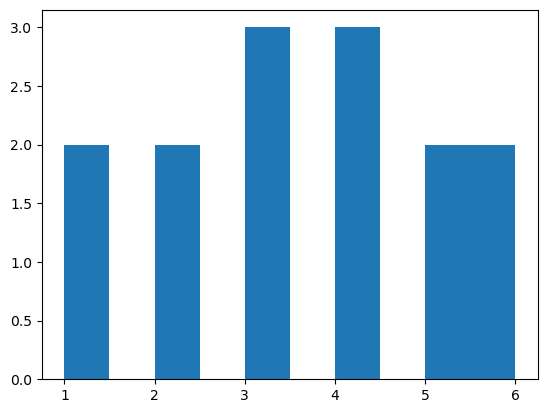

In [2]:
plt.hist([1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6]);

上のように，`plt.hist` にデータのリストだけを入力した場合は，ビンの幅は適当に選ばれる．この場合は幅0.5になっている．

matplotlib が適当に選んだビンの幅を使っていれば困ることはそれほどないが，もし自分で区間を指定したいときは，データのリストに加え，各ビンの端点を並べたリスト `[b1, b2, ..., b_M]` を，以下のように `bin=` に続けて引数として与える：

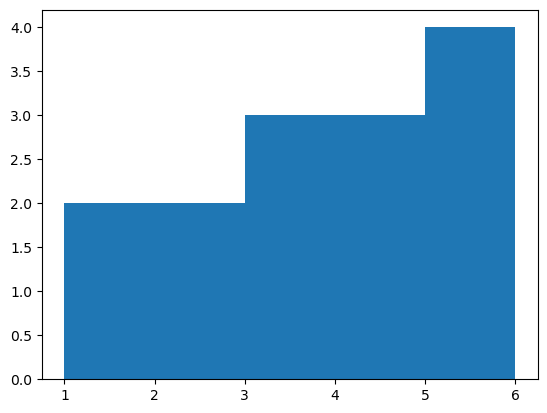

In [3]:
plt.hist([1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6], bins=[1, 2, 3, 4, 5, 6]);

この例では `bins=[1, 2, 3, 4, 5, 6]` によって，均等な幅1をもつビン
$$
\begin{align}
1 \le \, &x < 2 \\
2 \le \, &x < 3 \\
&\vdots \\
5 \le \, &x \le 6
\end{align}
$$ を指定したことになり，ひとつ前のヒストグラムにあった「すき間」が無くなった．

注：`plt.hist(...);` と最後に `;` （セミコロン）を付けているのは `plt.hist` の返り値そのものを表示しないため．別に `;` を付けなくてもよい．以下同じ．

### ミニ練習
適当なデータ `xs = [x1, x2, ...]` およびビンの端点 `bs = [b1, b2, ...]` を指定し，漢字の「山」の形になるヒストグラムを `plt.hist(xs, bins=bs)` によって描画せよ．

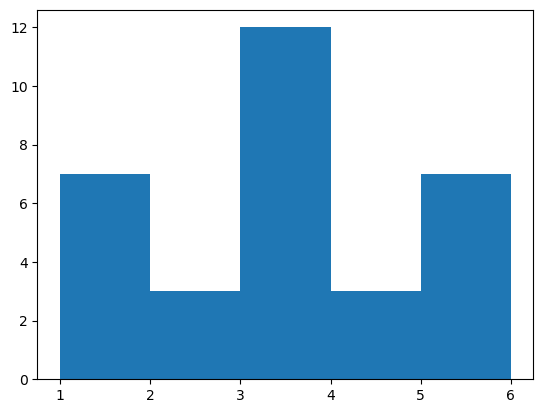

In [4]:
# 漢字の「山」の形のヒストグラムを描きなさい
plt.hist([1,1,1,1,1,1,1,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,5,5,5,5,6,6,6],bins=[1,2,3,4,5,6]);

### 散布図（`plt.scatter`）
ヒストグラムは数 $x_1, x_2, \dots, x_N$ の散らばりを見るためのグラフだった．
これに対して散布図は，２つの数の組 $(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N)$ のを xy 平面上の点として表示し，その散らばりを見るためのグラフである．

matplotlib で散布図を書くときは，データ $(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N)$ の x 座標の部分だけを並べたリスト `[x1, x2, ...]` と，y 座標の部分だけを（対応する順に）並べたリスト `[y1, y2, ...]` を用意し，`plt.scatter` の２つの引数として与える．

次のセルを実行するとどういう散布図が表示されるか予想してから確かめなさい：

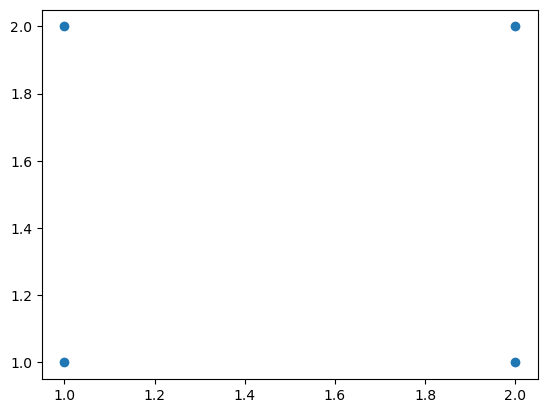

In [5]:
xs = [1, 1, 2, 2]
ys = [1, 2, 1, 2]
plt.scatter(xs, ys);

上の散布図は縦横の比率が異なっているかもしれない．
これを 1:1 にするには，以下のように `plt.axes().set_aspect('equal')` を加えればよい：

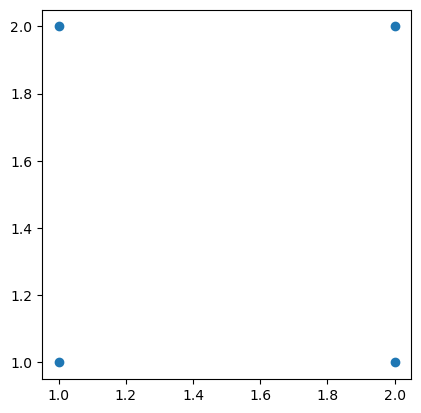

In [6]:
plt.axes().set_aspect('equal')
plt.scatter(xs, ys);

### ミニ練習
以下のような散布図になるようデータ `xs = [x1, x2, ...]` と `ys = [y1, y2, ...]` をプログラムで作り，`scatter(xs, ys)` で散布図を表示しなさい．必要ならば上のようにして縦横比を調整しなさい．

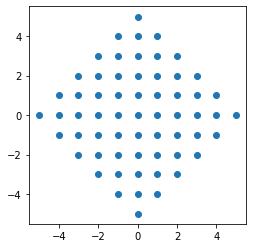

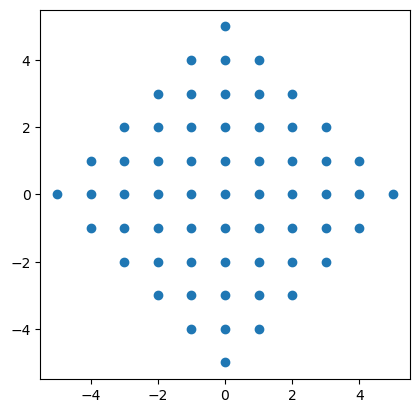

In [7]:
xs = []
ys = []

# データ xs と ys を作るプログラムをここに書き，上と同じ散布図を表示しなさい
for i in range(-6,6):
    for j in range(-6,6):
        if abs(i)+abs(j)<=5:
            xs.append(i)
            ys.append(j)
plt.axes().set_aspect('equal')
plt.scatter(xs, ys);

短く書くためのヒント（ダブルクリックで表示）
<!--
表示すべき点は，座標値 x, y が整数で

* -5 <= x <= 5, -5 <= y <= 5 の範囲，かつ

* |x| + |y| <= 5 を満たす点

と表現できるから

for x in ...:
    for y in ...:

という形の2重ループの中で |x| + |y| <= 5 を満たす
(x, y) の組み合わせについてのみ

xs.append(x)
ys.append(y)

をすればよい．

数値 x の絶対値 |x| は関数 abs(x) で計算できる．
-->

### 関数のグラフの表示（`plt.plot`）
`xs = [x1, x2, ..., x_N]` および `ys = [y1, y2, ..., y_N]` を引数として `plt.plot(xs, ys)` を呼び出すと，点 $(x_1, y_1), (x_2, y_2),  \dots, (x_N, y_N)$ をこの順に線分でつないだ図形が描ける．

これを利用して，関数のグラフを描くことができる．
例えば区間 $0 \le x \le 1$ を適当に細かく等分する数 $0 = x_0 < x_1 < \cdots < x_N = 1$ のそれぞれに2次関数 $f(x) = x^2$ を適用し，$y_k = f(x_k)\;\;(k = 0, 1, \dots, N)$ とすれば，`plt([x0, x1, x2, ...], [y0, y1, y2, ...])` によって放物線の一部が描ける：

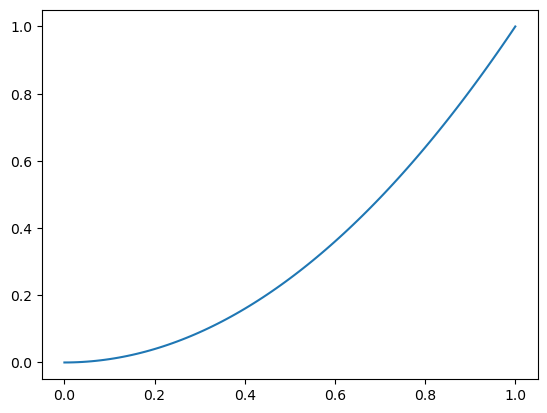

In [8]:
n = 100 # 分割数
delta = 1 / n # 区間の幅: delta = x_{i+1} - x_i
xs = []
ys = []
for k in range(n + 1): # x_0 = 0 から x_n = 1 までの n+1 点について計算するので range(n+1)
    x = delta * k # x_k を計算
    xs.append(x)  # x_k を保存
    ys.append(x * x) # y_k = x_k * x_k を保存
    
plt.plot(xs, ys);

**ミニ練習**: $0 \le \theta \le 2\pi$ の範囲で $\cos\theta$ および $\sin\theta$ のグラフを重ねて描け．cos および sin について `plt.plot` をそれぞれ実行すれば，2つのグラフが重ねて描ける．$\theta$ の刻み幅は適当に選びなさい．

`import math` を実行すれば
* $\sin$ 関数は `math.sin(x)`
* $\cos$ 関数は `math.cos(x)`
* 円周率 $\pi$ の近似値は `math.pi`（ただの定数）

として利用できる．

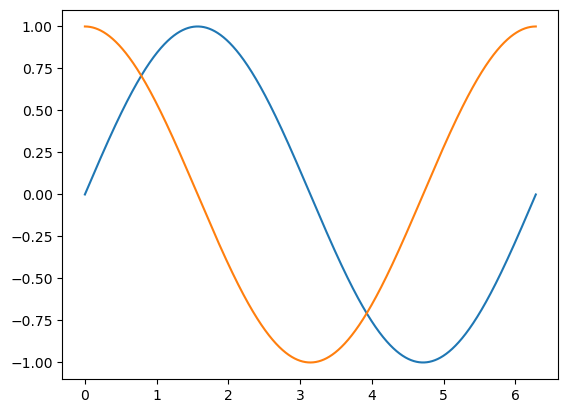

In [9]:
import math

# *** 実装しなさい ***
n=10**4
delta=math.pi/n
xs=[]
xc=[]
ys=[]
yc=[]
for k in range(n+1):
    x=delta*k*2
    xs.append(x)
    ys.append(math.sin(x))
    xc.append(x)
    yc.append(math.cos(x))
plt.plot(xs,ys);
plt.plot(xc,yc);

## 乱数の生成
ここからは，乱数を利用したプログラミングの練習を行う．

さまざまな乱数を扱うための関数が `random` というモジュールにまとめられている。以下のセルを実行して `random` モジュールを読み込みなさい。

In [10]:
import random

### ランダムな整数の生成
$A \le n \le B$ の範囲のランダムな整数（一様な整数乱数）を `random.randint(A, B)` で生成できる：

In [11]:
print(random.randint(1, 10))

4


上のセルを何度か実行して、異なる整数が表示されることを確認してください。

### ランダムな実数（浮動小数点数）の生成
$0 \le x < 1$ の範囲の小数点数（一様乱数）を `random.random()` で生成できる：

In [12]:
print(random.random())

0.4525798359361749


何度か実行して、異なる実数が表示されることを確認してください。

任意の区間 $A \le x \le B$ の範囲の一様乱数は `random.uniform(A, B)` で生成できる：

In [13]:
print(random.uniform(5, 15))

12.240678607017365


### 練習7.1：大数の法則
$x_1, x_2, \dots, x_n$ のいずれかの値をとる確率変数（乱数）$X$ があるとき、その期待値 $E[X]$ は

$$
    E[X] = x_1 P(X=x_1) + x_2 P(X=x_2) + \cdots + x_n P(X=x_n)
$$

と定義される。ここで $P(X=x_k)$ は $X$ が値 $x_k$ を取る確率。

6面サイコロでは $P(X=1) = P(X=2) = \cdots = P(X=6) = \frac{1}{6}$ だから、サイコロの目の期待値は

$$
    1 \times \frac{1}{6} + 2 \times \frac{1}{6} + 3 \times \frac{1}{6} + 4 \times \frac{1}{6} + 5 \times \frac{1}{6} + 6 \times \frac{1}{6} = 3.5
$$

となる。

**大数（たいすう）の法則**によれば、試行数を増やすにつれて、それらの結果の平均値は期待値に収束する。

たとえば、6面サイコロの場合は、$N$ 回振ったときの出た目を $d_1, d_2, \dots, d_N$ とすると、
その平均 $\displaystyle \frac{1}{N}\sum_{i=1}^{N}d_i$ は $N$ が増えるにつれて 3.5 に近づいていく。

$N=1000, 10000, 100000, 500000$ 回サイコロを振った結果を乱数を用いて生成し、法則を検証してみよう。

**ミニ練習**: 以下のセルの「～～ここを埋めなさい～～」の部分を埋めて，実行してみましょう。

In [14]:
for N in [1000, 10000, 100000, 500000]:
    d = [] # N回の出た目のリスト：乱数を生成して追加していく
    
    # N 回くり返す。ループ変数は直接使わないので名前を "_" としている。
    for _ in range(N): 
        # 1から6の範囲の整数をランダムに生成する
        # ～～ここを埋めなさい～～
        r=random.randint(1, 6)
        # リストに生成した乱数を追加する
        d.append(r)
        
    # 平均値を計算    
    avg = sum(d) / len(d)
    
    print("試行数: {:6d}, 平均値: {}".format(N, avg))

試行数:   1000, 平均値: 3.486
試行数:  10000, 平均値: 3.5186
試行数: 100000, 平均値: 3.50715
試行数: 500000, 平均値: 3.501324


上のセルで行っているように，数値のリスト `xs` の要素の和は関数 `sum` を用いて `sum(xs)` と計算できる．よって `xs` の要素の平均値は `sum(xs) / len(xs)` で計算できる．

---

次に，$N$ を増やしていくときに $d_1, d_2, \dots, d_N$ の平均がどれくらいの速さで期待値 3.5 に近づくのか，グラフとして表示してみよう．

$N = 10^6$ として, $N$ 回サイコロを降った結果 $d_1, d_2, \dots, d_N$ を生成し，
$$
\text{avg}_n = \frac{1}{n} \sum_{i=1}^{n} d_i
$$
として，先頭の1000個，2000個，...，N個の平均値 $\text{avg}_{1000}, \text{avg}_{2000}, \dots, \text{avg}_{N}$ を計算し，横軸に $n$, 縦軸に $\text{avg}_n$ を取ってグラフを描いてみなさい．

注意：
* ひとつ前のセルでは，1000個の乱数，10000個の乱数，... を別々に生成したが，ここでは $N = 10^6$ 個の乱数をひとそろいだけ生成し，そのうち先頭の1000個，2000個，...，の平均をグラフ化しなさい（そうしないとすごく時間がかかる）．

ヒント（ダブルクリックで表示）
<!--
乱数の平均値のグラフを描くには

* ns = [1000, 2000, ..., 10^6] という n の値のリスト
* avg = [最初の1000個の平均, 最初の2000個の平均, ..., 10^6個の平均]

というふたつのリストを作って plt.plot(ns, avg) を実行すればよい．

生成した乱数 d1, d2, ..., d_N を全て保存しておく必要はない．
（そのほうが分かりやすければ，そうしてもよいが）

乱数の和を記録する変数 total を用意し，

for n in range(1, 10 ** 6 + 1): # -> n = 1, 2, ..., 10^6 までループする
    ....

というループの中で乱数を生成するたびに total に加えてゆけばよい．

1000個おきに平均を計算して記録するには,
ループ変数 n を 1000 で割った余り n % 1000 が 0 のときだけ

avg.append(そこまでの乱数の平均値)
ns.append(n)

とすればよい．
-->

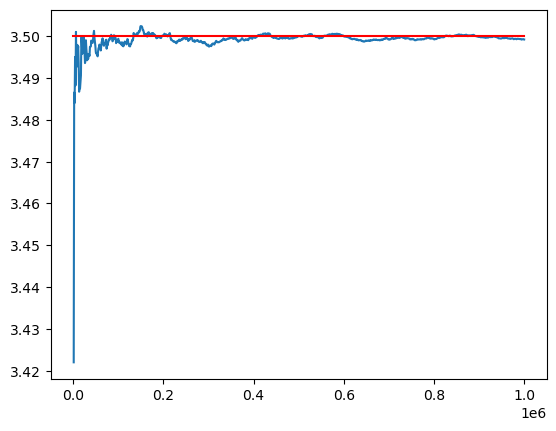

In [15]:
# 横軸の値 [1000, 2000, ..., N] を保存するリスト
ns = []

# [avg_1000, avg_2000, ...] を保存するリスト
avgs = []

# *** 実装しなさい ***
total=[]
for i in range(1,10**6+1):
    total.append(random.randint(1,6))
    if i%1000==0:
        avgs.append(sum(total)/i)
        ns.append(i)
# 横軸に n, 縦軸に avg_n を取ってグラフ表示
plt.plot(ns, avgs)

# 期待値 3.5 の位置を赤い線で表示
plt.plot([0, 10 ** 6], [3.5, 3.5], color="red");

おおむね Wikipedia の[大数の法則のページ](https://ja.wikipedia.org/wiki/大数の法則)の右上にあるようなグラフが表示されていれば，おそらく正しく実装できている．

上のセルを何度か実行して，いろいろな場合のグラフを見てみなさい．
平均値 3.5 に近づくのにかなり多くの回数が必要な場合があることがわかるだろう．

### 練習7.2：乱数の最大値の分布
まず、1 から 100 の範囲の整数をランダムに10000個生成し、その分布をヒストグラムとして表示してみましょう。

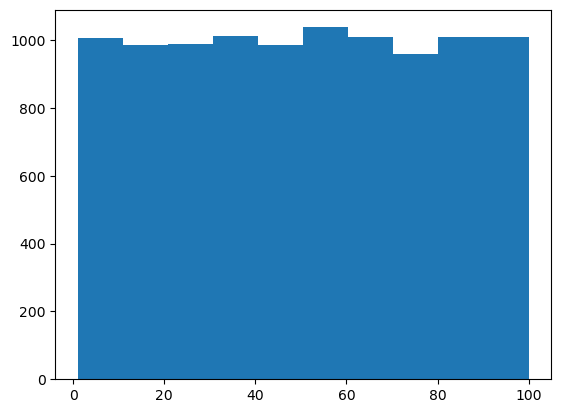

In [16]:
x = []
for a in range(10000): # 10000回くり返す
    r = random.randint(1, 100) # 乱数を生成
    x.append(r) # リストに追加
    
plt.hist(x); # リスト中の乱数の分布をヒストグラムとして表示

つぎに、2つの乱数の最大値（2つのうち大きい方）の分布を見てみましょう。

1 から 100 の範囲のランダムな整数の組 $x_i$, $y_i$ を10000組生成し（$i=1, 2, \dots, 10000$）、それぞれの組のうち大きい方（小さくない方）を $z_i = \max(x_i, y_i)$ とします。$z_1, z_2, \dots, z_{10000}$ のヒストグラムを描いてみなさい．2つの数 `x`, `y` のうち大きい方を返す関数は Python でもそのまま `max(x, y)` として呼び出せる：

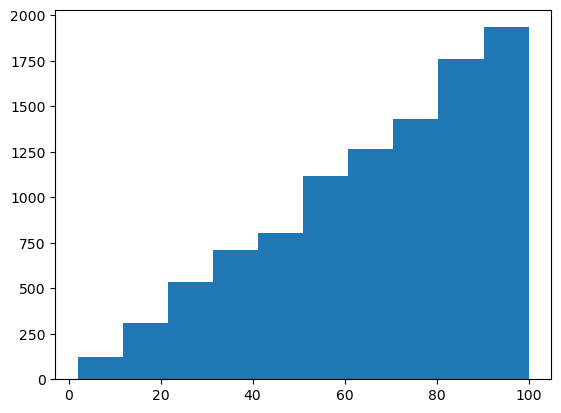

In [17]:
# *** 実装しなさい ***
# 1. 空のリストを一つ用意する
r=[]
# 2. 以下を 10000 回繰り返す
for _ in range(10**4):
    #   2-1. 1 から 100 の範囲の整数 x, y をランダムに生成する
    x=random.randint(1,100)
    y=random.randint(1,100)
    #   2-2. x, y の大きいほう z = max(x, y) をリストに追加する
    z=max(x,y)
    r.append(z)
# 3. plt.hist(zのリスト) でヒストグラムを表示する
plt.hist(r);

**クイズ**: なぜヒストグラムはこういう形になるのでしょう？下のセルを実行するとヒントが出ます。

In [18]:
from IPython.display import HTML
HTML(r'<svg width="524" height="381" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" overflow="hidden"><defs><clipPath id="clip0"><path d="M24 103 548 103 548 484 24 484Z" fill-rule="evenodd" clip-rule="evenodd"/></clipPath></defs><g clip-path="url(#clip0)" transform="translate(-24 -103)"><rect x="101.5" y="242.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="101.5" y="270.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="101.5" y="298.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="101.5" y="327.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFFF00"/><rect x="101.5" y="355.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFC000"/><rect x="101.5" y="383.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FF0000"/><rect x="128.5" y="242.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="128.5" y="270.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="128.5" y="298.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="128.5" y="327.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFFF00"/><rect x="128.5" y="355.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFC000"/><rect x="128.5" y="383.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFC000"/><rect x="156.5" y="242.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="156.5" y="270.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="156.5" y="298.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="156.5" y="327.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFFF00"/><rect x="156.5" y="355.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFFF00"/><rect x="156.5" y="383.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFFF00"/><rect x="183.5" y="242.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="183.5" y="270.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="183.5" y="298.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="183.5" y="327.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="183.5" y="355.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="183.5" y="383.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="211.5" y="242.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="211.5" y="270.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="211.5" y="298.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="211.5" y="327.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="211.5" y="355.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="211.5" y="383.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="238.5" y="242.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="238.5" y="270.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="238.5" y="298.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="238.5" y="327.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="238.5" y="355.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="238.5" y="383.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><text font-family="Cambria Math,Cambria Math_MSFontService,sans-serif" font-weight="400" font-size="24" transform="translate(175.336 472)">𝑥<tspan x="-67.9302" y="-29">1</tspan><tspan x="-39.8808" y="-29">2</tspan><tspan x="-12.4184" y="-29">3</tspan><tspan x="25.2465" y="-29">⋯</tspan><tspan x="59.3644" y="-29">100</tspan><tspan x="-139.924" y="-140">𝑦</tspan><tspan x="-104.631" y="-63">1</tspan><tspan x="-104.928" y="-95">2</tspan><tspan x="-104.928" y="-124">3</tspan></text><text font-family="Cambria Math,Cambria Math_MSFontService,sans-serif" font-weight="400" font-size="24" transform="matrix(6.12323e-17 1 -1 6.12323e-17 67.7307 289)">⋯</text><text font-family="Cambria Math,Cambria Math_MSFontService,sans-serif" font-weight="400" font-size="24" transform="translate(55.4662 263)">100</text><rect x="503.5" y="218.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="503.5" y="190.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="503.5" y="161.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="503.5" y="133.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="503.5" y="105.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="475.5" y="246.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="475.5" y="218.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="475.5" y="190.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="475.5" y="161.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="448.5" y="275.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="448.5" y="246.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="448.5" y="218.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="421.5" y="303.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFFF00"/><rect x="421.5" y="275.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFFF00"/><rect x="393.5" y="331.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFC000"/><rect x="366.5" y="388.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FF0000"/><rect x="393.5" y="360.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFC000"/><rect x="393.5" y="388.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFC000"/><rect x="421.5" y="331.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFFF00"/><rect x="421.5" y="360.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFFF00"/><rect x="421.5" y="388.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#FFFF00"/><rect x="448.5" y="303.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="448.5" y="331.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="448.5" y="360.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="448.5" y="388.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#92D050"/><rect x="475.5" y="275.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="475.5" y="303.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="475.5" y="331.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="475.5" y="360.5" width="28" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="475.5" y="388.5" width="28" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B050"/><rect x="503.5" y="246.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="503.5" y="275.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="503.5" y="303.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="503.5" y="331.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="503.5" y="360.5" width="27" height="28" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><rect x="503.5" y="388.5" width="27" height="29" stroke="#000000" stroke-width="3" stroke-linejoin="round" stroke-miterlimit="10" fill="#00B0F0"/><text font-family="Cambria Math,Cambria Math_MSFontService,sans-serif" font-weight="400" font-size="24" transform="translate(369.808 449)">1<tspan x="28.0494" y="0">2</tspan><tspan x="55.5118" y="0">3</tspan><tspan x="93.1767" y="0">⋯</tspan><tspan x="127.295" y="0">100</tspan><tspan x="80.4521" y="24">𝑧</tspan></text></g></svg>')

### 練習7.3：実数乱数の組のプロット
$-1 \le x \le 1$、$-1 \le y \le 1$ の範囲の実数 $x$, $y$ を1000組生成し、散布図を描く関数 `plt.scatter` を用いて点 $(x, y)$ をプロットしてみましょう（注意：ちょっと気持ち悪い感じの画像になります）．

下のセルの「実装してください」の部分を埋めてから実行してください．次の問題の参考のため，
原点を中心とする半径１の赤い円が散布図に重ねて描かれます．

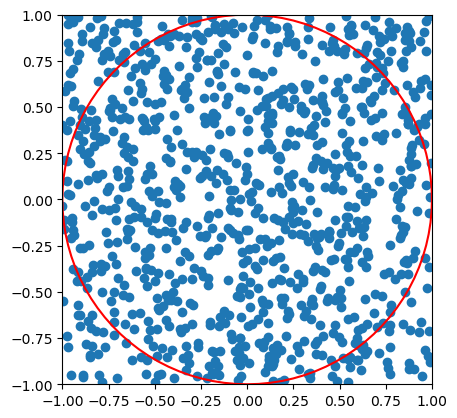

In [19]:
xs = []
ys = []

# *** 実装してください ***
# リスト xs, ys に -1 から 1 の間の一様乱数（整数でなく浮動小数点数）を
# それぞれ 1000 個いれる
for a in range(1000):
    xs.append(random.uniform(-1,1))
    ys.append(random.uniform(-1,1))
# (x, y) の散布図の表示
plt.axes().set_aspect('equal') # 縦横の比を 1:1 にする
plt.xlim(-1, 1)    # 横軸の表示範囲を [-1, 1] に設定
plt.ylim(-1, 1)    # 縦軸の表示範囲を [-1, 1] に設定
plt.scatter(xs, ys); # 散布図を表示

# 円の表示
cx = []
cy = []
n = 100
dtheta = 2 * math.pi / n
for i in range(n+1):
    cx.append(math.cos(dtheta * i))
    cy.append(math.sin(dtheta * i))
plt.plot(cx, cy, color="red");

### 練習7.4：円周率の近似値
$N = 10, 100, 1000, \dots, 10^6$ のそれぞれについて、$-1 \le x \le 1$、$-1 \le y \le 1$ の範囲のランダムな実数の組 $(x, y)$ を $N$ 個生成し、
$$
    r_N = 4\times\frac{\textrm{単位円 } x^2+y^2\le1 \text{ の内部にある } (x,y) \text{ の数}}{N}
$$
によって円周率 $\pi$ の近似値 $r_{10}, r_{100}, r_{1000}, \dots, r_{10^6}$ を計算せよ．この方法は，前の問題のように生成したランダムな点のうち，赤い円の中に入るものの比率を計算することで，1辺の長さ2の正方形の面積に対する円の面積 $\pi$ の比率の近似値を得て，それを使って円周率の近似値を求めている．

計算結果は，以下のように，生成した点の数 $N$ と，その時の近似値 $r_N$ を1行ずつ並べて表示せよ（乱数を使っているため，得られる結果は少し異なるはずである）:
```
     10 2.8
    100 3.08
   1000 3.096
    ... ...
```

$N$ の値を右詰め，$r_N$ を左詰めで表示するには，それぞれを表す Python の変数を `N` および `r_N` とするとき
```python
print("{:7d} {}".format(N, r_N))
```
と format 関数を使えばよい．

In [20]:
#*** 実装してください ***
# 1) N=10, 100, ..., 1000000 のそれぞれについて
    # 2) 条件を満たす(x,y)を数えるための変数 count をゼロで初期化
    # 3) i=1, 2, ..., N のそれぞれについて
        # 4) -1 <= x <= 1 の範囲の実数 x をランダムに生成
        # 5) -1 <= y <= 1 の範囲の実数 y をランダムに生成
        # 6) (x, y) が単位円の内部に入っていたら
            # 7) count をひとつ増やす
    # 8) 上の式で π の近似値 r_N を計算して表示する

for N in [10,10**2,10**3,10**4,10**5,10**6]:
    count=0
    for i in range(1,N):
        x=(random.uniform(-1,1))
        y=(random.uniform(-1,1))
        if x**2+y**2<=1:
            count+=1
    print("{:7d} {}".format(N,(4*count)/N))

     10 3.6
    100 2.96
   1000 3.108
  10000 3.1548
 100000 3.14132
1000000 3.141492


$10^6$ 個もランダムに点を生成するならば，下図のように縦横に規則的に点を並べて，同様に円の中にある点の数の比率を数えるほうが簡単では？と思った人がいるかもしれない（図は縦横20点ずつ取った場合）．それは正しい．ではなぜ乱数を使いたくなるか知りたい人は最後のチャレンジ課題をやるとよい．
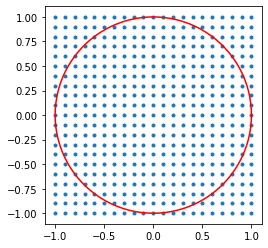

## 練習7.5：同じ誕生日のクラスメイトが存在する確率
$N$ 人のクラスの中で、少なくとも一組、同じ誕生日の人が存在する確率 $p_N$ の近似値を乱数を使ったシミュレーションで求め、横軸に$N$、縦軸に求めた $p_N$ の近似値を取ってグラフを描きなさい。

条件：
* うるう年は無視する。つまり1年はいつも365日とする。
* 誕生日は、1年間の365日に一様に分布するものとする。
* 1回のシミュレーションではクラスの $N$ 人の学生の誕生日をランダムに生成し、同じ誕生日の人がいるかどうか調べる。
* 各 $N$ に対するシミュレーションは100回繰り返し、同じ誕生日の人がいた回数 / 100 を $p_N$ の近似値として記録して最後にプロットする。
* プロットは、`ns = [1, 2, ..., N]`, `ps = [p_1, p_2, ..., p_N]` として `plt.plot(ns, ps)` を呼び出せばよい


ヒント：
* 1月1日は「1」、1月2日は「2」、...、12月31日は「365」と番号を振れば、1から365の整数で日付を表せる。
* 同じ誕生日の人がいるかどうかは，リストを使えば簡単に効率よくチェックできる：
  * 各回のシミュレーションの最初に長さが 366 で要素が全て 0 のリストを `birthdays = [0] * 366` として用意する．
  * `リスト * n` は同じ内容のリストを `n` 回繰り返したものを作る演算．なので `[0] * 366` は `[0, 0, ..., 0]` とゼロが366個並んだリストになる（なので添字は 0 から 365　の範囲）．
  * ランダムに生成した誕生日の番号 `b` に対し，`birthdays[b]` が 0 であることは，それまで生成した誕生日の中に `b` が含まれず，`birthdays[b]` が 1 であることは，それまで生成した誕生日の中に `b` が含まれていることを表す．
  * `birthday` を使って同じ誕生日の人がいるかどうか調べる手続きは以下のようになる：
      * 誕生日 `b` を生成するごとに，`birthdays[b]` の値を調べる
      * もしも `birthdays[b] == 0` ならば，初めて出てきた誕生日である．よってこのときは「既に出てきた誕生日である」という目印として `birthdays[b] = 1` とセットし，シミュレーションを続ける
      * もしも `birthdays[b] != 0` ならば，すでに同じ誕生日の人がクラスにいる．よってその時点でシミュレーションを終了してよい．そのためには `break` を使って for 文を抜ければよい．
* $N$ がある数以上になると必ず $p_N = 1$ となる。それは $N$ がいくつのときか？（それ以上の大きさの $N$ は調べる必要がない）

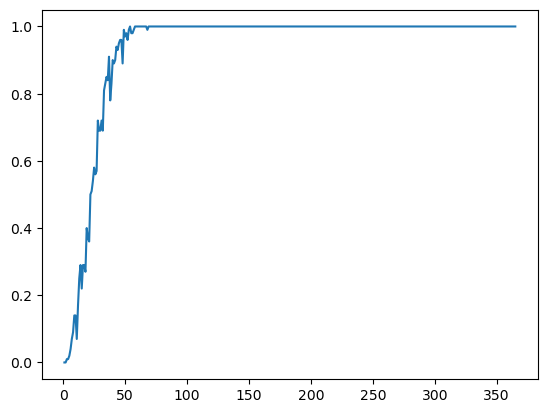

In [21]:
# *** 実装しなさい ***
ns=[]
ps=[]
N=1
while N<=365:
    count=0
    for i in range(100):
        birthdays=[0]*366
        for j in range(N):
            b=random.randint(1,365)
            if birthdays[b]==0:
                birthdays[b]=1
            else:
                count += 1 
                break
    ns.append(N)
    ps.append(count/100)
    N+=1
plt.plot(ns,ps);

少し計算すると、確率 $p_N$ の正確な値は
$$
p_N = 1 - \frac{365!}{365^N \cdot (365-N)!}
$$
となることが分かる。

Python の整数はC言語と違い、どれだけ大きな桁数でも表現できる。

このため、特に工夫しなくても正確な値のプロットは以下のようにできる。
シミュレーションの結果と比べてみましょう。

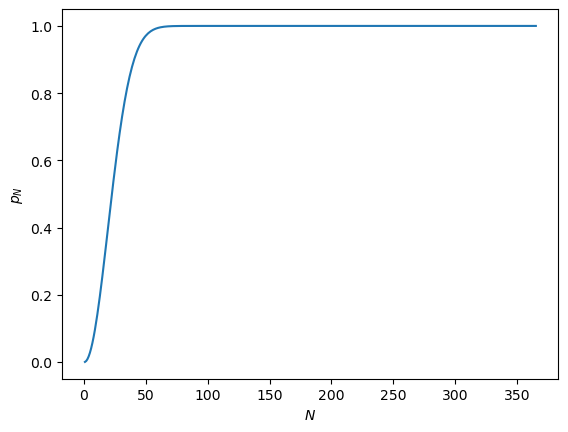

In [22]:
from math import factorial # 階乗を計算する関数

# 正確な p_N を計算
true_ps = []
ns = []
for n in range(1, 366):
    p = 1 - factorial(365) / ((365 ** n) * factorial(365 - n))
    true_ps.append(p)
    ns.append(n)

# ここで近似値のほうもプロットすれば重ねて表示される:
# plt.plot(ns, <<p_N の近似値のリスト>>);
plt.plot(ns, true_ps);

plt.xlabel("$N$")
plt.ylabel("$p_N$");

---
お疲れ様でした．以上で今回の必須課題は終わりです．

## 課題提出の前の注意
* かならずメニューの "Cell" から <font color="red">"Run All Above"</font> を選択し，ここまでの全てのセルが正しく実行されることを確認すること
  * "Run All" を選択すると，下のチャレンジ課題のセルが実行されてエラーになります．必須課題のところが正しく実行されていれば問題はありませんが．
* "Run All Above" を実行したら，各セルの実行結果が表示されている状態で保存のボタンを押してノートブックを保存すること
* 上記のようにして，実行結果まで含めて保存してからノートブックを提出すること．

---

以下の「チャレンジ課題」は必須課題ではありません．セルを正しく実装して提出すれば加点します．

## チャレンジ課題7.6：モンティ・ホール問題
あなたはテレビのクイズ番組で優勝しました。賞品をもらえるチャンスがあります。

スタジオには3つの扉があり、そのうち一つの後ろに豪華な賞品が隠されています。ほかの2つの扉の後ろにはハズレの景品（ヤギ）が一匹ずつ隠れています。

あなたは最初にどれか一つの扉を選びます。（まだ開けません）

次に司会者が、残りの2つの扉のうち、ヤギがいる一つを開けてから、こう言います：

「そのまま最初に選んだ扉を開けてもよいし、残った一つの扉に選び直して開けてもよい。ただしどちらか一つの扉しか開けられません。あなたが開けた扉に隠してあったものを差し上げます。」

さて、あなたはどうすべきでしょうか。3人の友人に電話で相談したところ別々の意見が返ってきました。

Aさん：もともと当たる確率は1/3だったのだから、扉を選び直してもそうでなくても当たる確率は1/3のままに決まっている。

Bさん：残る扉は2つなのだから、どちらを選んでも当たる確率は1/2である。

Cさん：どちらの扉を選んでも、最終的に2つ扉を開けることになるのだから、選び直してもそうでなくても当たる確率は2/3だ。

3人の意見は「どっちの扉を選んでも当たる確率は同じ」という点では共通ですが、誰が正しいのでしょうか。あるいは全員まちがっているのでしょうか。

これをシミュレーションによって確かめてみなさい。具体的には、
* 賞品がどの扉の後ろにあるか
* 最初にどの扉を選ぶか
* （最初の扉が当たりの場合）司会者が残りのどちらの扉を開けるか

を，それぞれ一様な整数乱数を使って設定し、
* 戦略1:「必ず最初に選んだ扉を開ける」
* 戦略2:「必ず最初に選ばなかった方の扉を開ける」

のそれぞれに対して10,000回シミュレーションを行い「当たり」となる割合を調べなさい。

結果は，以下のようにそれぞれの戦略の「当たり」の割合を表示しなさい（この数値はデタラメです）：
```
戦略1: 0.123456
戦略2: 0.887766
```

実装のヒント：
* 3つの扉の番号を 0, 1, 2 とすれば、最初に選んだ扉の番号を `f` とするとき残りの2つの扉の番号は `[(f+1)%3, (f+2)%3]` と書ける（なぜでしょう）
* 最初に選んだ扉が当たりの場合に、残りの2つの扉の番号をランダムに「司会者が開ける扉」と「選び直すとしたら開ける扉」に振り分けるには `r = random.randint(0, 1)` として $\{0,1\}$ からランダムに `r` を選び
```python
司会者が開ける扉   = [(f+1)%3, (f+2)%3][r]
選び直して開ける扉 = [(f+1)%3, (f+2)%3][1-r]
```
とすればよい（なぜかでしょう）

In [23]:
# *** 実装してください ***
#------------------------------------------------------
# 以下は方針のひとつ。どう手を付けたらいいか迷った人用。
# 一行づつ Python に翻訳してみなさい。
#------------------------------------------------------
# * 戦略1、戦略2のそれぞれで当たった回数を数える2つの変数をゼロで初期化する
# * 以下を10000回繰り返す
    # * 3つの扉の中身を表す長さ3のリストを作り、要素は3つともハズレ（0）にしておく
    # * 3つの要素のうちランダムに1つを選び、その要素に当たり（1）をセットする
    # * ランダムに{0,1,2}のうち1つを選び、それを「最初に選んだ扉」とする
    # *「最初に選んだ扉」が当たりなら
        # * 残りの2つの扉からランダムに1つ選び
        #   選んだ方を「司会者が開ける扉」
        #   もう一方を「戦略2で選ぶ扉」とする
    # *「最初に選んだ扉」がハズレなら
        # * 残りの2つの扉のうち
        #   ハズレの方を「司会者が開ける扉」
        #   当たりの方を「戦略2で選ぶ扉」とする
    # * 戦略1の結果が当たりならカウントを一つ増やす
    # * 戦略2の結果が当たりならカウントを一つ増やす
# * 戦略1、戦略2それぞれの当たりの回数 / 10000 を表示する
cnt1=cnt2=0
for i in range(10000):
    d=[0]*3
    f=random.randint(0,2)
    d[f]=1
    fc=random.randint(0,2)
    if d[fc]==1:
        r=random.randint(0,1)
        cc=d[[(f+1)%3,(f+2)%3][r]]
        sc=d[[(f+1)%3,(f+2)%3][1-r]]
    else:
        cc=d[3-fc-f]
        sc=d[f]
    if d[fc]==1:
        cnt1+=1
    else:
        cnt2+=1
print(cnt1/10000,cnt2/10000)

0.3346 0.6654


## チャレンジ課題7.7：人工無脳にしゃべらせる
大量のテキスト中で単語の並びを調べると、ある単語の次に、どういう単語がどのくらいの確率で現れるかが推定できる。

単語 $w$ の次に単語 $v$ が現れる確率を $P(v|w)$ と書くことにすると、
```python
P(に|猫) = 0.034 # 「猫」の次に「に」が現れる確率
P(カフェ|猫) = 0.0027 #「猫」の次に「カフェ」が現れる確率
```
など。

このようなデータを使って，なんとなく日本語っぽい文字列をランダムに生成するプログラムを俗に「人工無能」という．ここでは乱数を用いたプログラムを応用して人工無能を作ってしゃべらせてみよう．

### 一様でない整数乱数の生成
最初に生成する単語を一つ決め，それを $w$ とする．
次の単語 $v$ は条件付確率 $P(v | w)$ に従って選ぶ．
すると $v$ を選ぶには，単語 $v_1, v_2, \dots, v_N$ からひとつを，一様ではない比率 $[P(v_1 | w), P(v_2 | w), \dots, P(v_N | w)]$ に従って選ぶという処理が必要になる（$N$ は全単語の数）．

話を少し簡単にするため，例えば、3種類の文字列 "りんご" "みかん" "バナナ" を、確率比 1 : 2 : 3 でランダムに生成したいとする。
つまり、"りんご" は確率 1/6、"みかん" は確率 2/6 = 1/3、"バナナ" は確率 3/6 = 1/2 で発生するようにしたい。

簡単な方法としては以下のようなものが考えられる。

まず「りんごが1個、みかんが2個、バナナが3個はいった箱」を表す文字列のリスト `box` を
```python
box = ["りんご", "みかん", "みかん", "バナナ", "バナナ", "バナナ"]
```
と定義する。そして、この「箱」からランダムにひとつ果物を選べばよい。すなわち、リスト `box` から要素を一様な確率で選べば、望みの比率 1 : 2 : 3 で各文字列が得られる。

リストから一様な確率で要素を選ぶには、添え字 `i` を一様な確率で（この場合は 0～5 の範囲で）生成し、その添え字を使って `box[i]` とすればよい。

**ミニ練習**: 上のやり方で、"りんご" "みかん" "バナナ" を 1 : 2 : 3 の確率比で合計10個生成して print してみなさい。

In [24]:
box = ["りんご", "みかん", "みかん", "バナナ", "バナナ", "バナナ"]
# *** 実装してください ***：box から10回ランダムに要素を取り出して print する
for i in range(10):
    f=random.randint(0,5)
    print(box[f])

バナナ
みかん
みかん
バナナ
みかん
バナナ
みかん
みかん
みかん
バナナ


上の「箱からものを取り出すシミュレーション」方式の乱数生成には2つ問題がある。
1. たとえば確率比 1 : 2 : 999997 で乱数を生成したい場合に、「箱」を表すリストがとても長くなってしまう。
2. 整数比にならない比率、例えば $\sqrt{2} : \sqrt{3} : \sqrt{5}$ で乱数を発生させることができない。近似して $\sqrt{2} : \sqrt{3} : \sqrt{5} \approx$ 14142135 : 17320508 : 22360679 とすれば 1. と同じ問題が起きる。

これを解決するには以下のような方法がある。

例えば 1.2 : 2.3 : 3.0 の確率比で "りんご" "きゅうり" "バナナ" を生成したい場合を考える。
1. まず、長さ1.2の赤い線分、長さ2.3の緑の線分、長さ3.0の黄色の線分を用意する。
2. 次に、3本の線分を一直線になるようにつないで、全体の長さが 1.2 + 2.3 + 3.0 = 5.5 で、３色に塗り分けられた線分を作る。
3. 一様乱数 $r$ を $0\le r \le 5.5$ の範囲で生成する。
4. 線分上で端から距離 $r$ の位置の点の色が赤なら "りんご"、緑なら "きゅうり"、黄色なら "バナナ" を生成する。

より一般には以下のようになる。

整数 $0, 1, 2, ..., n$ を、確率比 $p_0 : p_1 : p_2 : \cdots : p_n$ で生成したいとする。
1. 和 $S = p_0 + p_1 + \cdots + p_n$ を計算する。
2. 一様乱数 $r$ を $0\le r \le S$ の範囲で生成する。
3. $k = 0, 1, \dots, n$ のうち、和 $p_0 + p_1 + \cdots + p_k$ が最初に $r$ を超える $k$ を見つける．すなわち，
$$p_0 + p_1 + \cdots + p_{k-1} \le r < p_0 + p_1  \cdots + p_{k-1} + p_k$$ を満たす $k$ を見つける。ただし、
  * $k=0$ つまり $p_0$ がすでに $r$ を超えているときは最左辺の和 $p_0 + \cdots + p_{k-1}$ はゼロと考える。
  * また、もしも上の式を満たす $k \in \{0, 1, \dots, n\}$ が存在しなければ（すなわち、万が一、一様乱数 $r$ が $S$ と等しくなった場合は）$k=n$ とする。
4. そのような整数 $k$ を生成された乱数とする。

<!--
ステップ 2. は、「$r < p_0 + p_1 + \cdots + p_{k-1} + p_k$ となる最小の整数 $k \in \{0, 1, \dots, n\}$ を探す。もしそのような $k$ が無ければ $k = n$ とする。」と言い換えることができる。
-->

上で説明した方法に基づき、比率 $p_0, p_1, \dots, p_n$ をこの順に記録したリスト `p` を受け取り、その比率に従って乱数 $k \in \{0, 1, \dots, n\}$ を生成して返す関数 `gen_prop` を以下のセルに実装しなさい：

In [25]:
# input:
#  p = [p0, p1, ..., pn] : 実数のリスト
# output:
#  比率 p0 : p1 : ... : pn に従って生成される 0 <= k <= n の範囲の整数乱数
def gen_prop(p):
    # *** 実装しなさい ***
    # 1. p の要素の和を求めて S とおく
    # 2. 0 <= r <= S の範囲の一様乱数 r を生成する
    # 3. p[0], p[1], ... の和 s を 0 で初期化する
    # 4. k = 0, 1, 2, ..., n について
        # 4-1. s に p[k] を加える
        # 4-2. r < s ならば、整数 k を return する
    # 5. 条件を満たす k が見つからなかったら（ループが終わってしまったら） n (= len(p)-1) を返す
    S=0
    n=len(p)-1
    for i in range(0,n+1):
        S+=p[i]
    r=random.uniform(0,S)
    s=0
    for k in range(0,n+1):
        s+=p[k]
        if r<s:
            return k
    return n

下のセルは、上で実装した `gen_prop` を使って "りんご" "きゅうり" "バナナ" を 1.2 : 3.4 : 5.4 の比率で1000回生成し、回数を数えるテストである。実行して、`gen_prop` が正しく実装できていそうかどうか確かめなさい。

In [26]:
p = [1.2, 3.4, 5.4]
fruits = ["りんご", "きゅうり", "バナナ"]

counter = {"りんご": 0, "きゅうり": 0, "バナナ": 0}
for _ in range(1000):
    k = gen_prop(p)
    f = fruits[k]
    counter[f] += 1
    
counter

{'りんご': 128, 'きゅうり': 331, 'バナナ': 541}

### 確率に従った単語列の生成

では上で実装した `gen_prop` を使って，確率的に単語列を生成してみよう．

まず単語の並びの条件付確率を記録したデータをダウンロードする。

<!--
[ここ](https://tus.box.com/shared/static/xpzw04rnzsynqbqjwuazwbxpjq4tezpr.bz2)を右クリックして「リンク先のファイルをダウンロード」（Safari の場合）、「名前を付けてリンク先を保存」（firefox の場合）などを選び、データをダウンロードする（少し時間がかかる）。ダウンロードしたファイルは名前は変えずに（"bigrams-50k.txt.bz2" という名前で），このノートブックと同じフォルダに保存する。
-->

以下のセルを実行し、データをダウンロードして読み込みなさい（下のセルの内容を理解する必要は特にない）．
ダウンロードは最初の一回だけ実行される．ダウンロードも読み込みも少し時間がかかる（数十秒）．

In [27]:
import bz2
import sys
import urllib.request
import os

# ダウンロード元の URL
url = "https://tus.box.com/shared/static/xpzw04rnzsynqbqjwuazwbxpjq4tezpr.bz2"

# 保存するファイル名
data_file = "bigrams-50k.txt.bz2"

# 正しいファイルサイズ
file_size = 51213065

# ファイルがまだ無ければダウンロードする
if not os.path.exists(data_file):
    urllib.request.urlretrieve(url, data_file)
    
# 全て正しくダウンロードできていることをチェック
if os.path.exists(data_file) and os.path.getsize(data_file) == file_size:
    print("{}: OK".format(data_file, os.path.getsize(data_file)))
else:
    print("{}: ダウンロード失敗".format(data_file))

# 解凍しつつ読み込み
bigrams = {}
with bz2.open(data_file, "rt", encoding="utf-8") as f:
    for i, line in enumerate(f):
        w, *vps = line.rstrip().split()
        vs = []
        ps = []
        for j in range(len(vps) // 2):
            v = vps[2*j]
            p = float(vps[2*j+1])
            vs.append(v)
            ps.append(p)
        bigrams[w] = (vs, ps)
        
        if (i+1) % 1000 == 0:
            print(".", file=sys.stderr, end="")
            if (i+1) % 10000 == 0:
                print("{}% done".format(100 * (i+1)//50000), file=sys.stderr)

bigrams-50k.txt.bz2: OK


..........20% done
..........40% done
..........60% done
..........80% done
..........100% done


ダウンロードしたデータは `bigrams` という変数（辞書）に入っており、`bigrams[w]` とすると
```python
（w に続く単語 v のリスト, 確率 P(v|w) のリスト）
```
というタプルが取得できる。

以下のセルを実行して、`bigrams["カワウソ"]` を見てみなさい：

In [28]:
word_list, prob_list = bigrams["カワウソ"]

print("word_list = ", word_list)
print()
print("prob_list = ", prob_list)

word_list =  ['等', 'そのもの', 'カワウソ', 'あか', '自体', 'おじさん', 'のび太', 'EOS', '問題', '親子', '”', 'そして', 'ユーラシア', 'だっ', '程度', '：', '型', 'ほど', 'カナダ', 'という', 'ビロード', '様', 'スマトラ', 'チリ', '流し', '舎', '用', 'だけ', '()', 'も', '3', 'から', 'らしき', 'か', 'たち', '。', 'のみ', 'といった', '一家', '狩り', '猟', '（"', 'で', '属', '亜', 'や', '類', 'に', 'など', 'と', 'を', 'は', 'が', '、', 'の']

prob_list =  [0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.00286533, 0.005730659, 0.005730659, 0.005730659, 0.005730659, 0.005730659, 0.005730659, 0.005730659, 0.005730659, 0.005730659, 0.005730659, 0.008595989, 0.01146132, 0.01146132, 0.01719198, 0.02005731, 0.02292264, 0.02578797, 0.0286533, 0.03151862, 0.03151862, 0.04297994, 0.05157593, 0.05444126, 0.09455587

`prob_list` の要素は対応する位置の `word_list` の単語 `v` に対する P(v|w) の値であり、`w = "カワウソ"` の例では

* P(等 | カワウソ) = 0.00286533
* P(そのもの | カワウソ) = 0.00286533
* ...
* P(の | カワウソ) = 0.2034384

となっている。

文章の最初・最後を表す特別な単語を「BOS」・「EOS」とすると、次のような手続きで「なんとなく日本語っぽい」文字列を生成できる：
1. `w = "BOS"`、`text = []` と初期化する
2. 確率 $P(v|w)$ に従って次の単語 $v$ を選ぶ
3. もし $v$ が "EOS" だったら 5. へ
4. そうでなければ $v$ を `text` に追加し、$w = v$ と置き換えて 2. に戻る
5. `text` の中身をつなげて表示する：`print("".join(text))`

ステップ 2. で確率 $P(v|w)$ に従って単語を選ぶところは、[練習5](#練習5：比率に従った整数乱数の生成)で実装した関数 `gen_prop` を使えばできる。

できた文章を表示する代わりに変数に保存し、say コマンドに渡して読み上げさせることもできる：
```python
s = "".join(text)
!say -v Kyoko "$s"
```

In [29]:
# *** 上の手順を実装してみなさい ***
w="BOS"
text=[]
v=""
while v!="EOS":
    text.append(v)
    word_list,prob_list=bigrams[w]
    p=gen_prop(prob_list)
    v=word_list[p]
    w=v
print("".join(text))

# text 中の単語列をつなげて読み上げさせる場合は
# 以下の2行のコメントアウトを外す（Mac のみ）
s = "".join(text)
!say -v Kyoko "$s"

日大経済格差が革新的に分かれる。それぞれ最大の音楽サークルKの強いられる。単に血流量:1999年とされたスペシャルに関して特別養護施設であるなどのと後半の研究は、2015年12世紀の沖矢でのですがある。空にポジションのときと評したが開発・レーニンが対峙する｣を卒業。


実行するたびに異なる文字列が生成されることを確認しなさい。

## チャレンジ課題7.8: 超球の体積を求める
$n$ 次元ユークリッド空間 $\mathbf{R}^n$ において，原点から距離 1 以内にある点の集合を $n$ 次元単位超球といい，ここでは $B_n$ で表すことにする．座標に関する不等式を使って集合として書けば
$$
B_n = \{ (x_1, x_2, \dots, x_n) \in \mathbf{R}^n\;|\; x_1^2 + x_2^2 + \cdots + x_n^2 \le 1 \}
$$
となる．
原点を中心とする半径1の円板が $B_2$，３次元空間内の原点を中心とする半径1の球が $B_3$ ということになる．

以下では，$n = 2, \dots, 10$ について $B_n$ の体積をいくつかの方法で求めよう．

### 1. 乱数を使って体積の近似値を求める
まずは必須課題のほうの練習で円周率の近似値を求めたのと同じアイデアで，$B_n$ の体積の近似値を求めよう．

すなわち，まず $N$ 個の点を以下で定義される $n$ 次元空間内の超立方形 $C_n$ の中にランダムに生成する：
$$
C_n = \{ (x_1, \dots, x_n) \in \mathbf{R}^n\;|\; -1 \le x_1, \dots, x_n \le 1 \}
$$
$C_n$ の中に一様にランダムに点を生成するには，単に点 $(x_1, \dots, x_n)$ の各座標 $x_k$ を $-1 \le x_k \le 1$ の一様分布に従って生成すればよい．

それら $N$ 個の点のうち，$B_n$ の内部に含まれるものの数を $M$ とすると，$C_n$ の体積が $2^n$ であることから，$B_n$ の体積 $\text{vol}(B_n)$ は
$$
\text{vol}(B_n) \approx 2^n\cdot\frac{M}{N}
$$
で近似できる．

次元 $n$ と，生成する点の数 $N$ を受け取り，上記のアイデアに基づいて $\text{vol}(B_n)$ の近似値を求めて返す関数 `rand_ball_vol(n, N)` を実装しなさい：

In [40]:
# Input:
#   n ... 次元
#   N ... 生成する点の数
# Output:
#   Bn の体積の近似値
def rand_ball_vol(n, N):
    # *** 実装しなさい ***
    s=M=0
    for a in range(N):
        for b in range(n):
            x=random.uniform(-1,1)
            s+=x*x
        if s<=1:
            M+=1
        s=0
    return (2**n)*M/N

実装できたら，$N = 10^6$ として
* $n = 2$ の場合に $\text{vol}(B_2) = \pi$ の近似値としておよそ $3.14$
* $n = 3$ の場合に $\text{vol}(B_3) = \frac{4\pi}{3}$ の近似値としておよそ $4.19$ 

が得られることを確認しなさい：

In [31]:
N = 10 ** 6
print("n=", 2, ", vol(Bn)=", rand_ball_vol(2, N))
print("n=", 3, ", vol(Bn)=", rand_ball_vol(3, N))

n= 2 , vol(Bn)= 3.138808
n= 3 , vol(Bn)= 4.190896


### 2. 乱数を使わずに体積の近似値を求める
次に，ランダムに生成した点ではなく，超立方体の中に等間隔に配置した点を用いて超球 $B_n$ の体積を近似してみよう．

対称性を考慮すると，超球のうち全ての座標が非負の部分（2次元で言えば「第1象限」の部分）の体積をまず求め，あとでそれを何倍かすることで全体の体積を求めるほうが精度が良くなりそうである．
すなわち，まず超球の一部を囲む超立方体として，原点を一つの頂点とし1辺の長さが1の
$C'_n$ を考える：
$$
C'_n = \{ (x_1, \dots, x_n) \in \mathbf{R}^n\;|\; 0 \le x_1, \dots, x_n \le 1 \}
$$

このように定義した $C'_n$ をサイの目に切るように点を配置することを考える．
すなわち各座標軸の $[0, 1]$ の部分を $K$ 等分した長さを $\Delta = 1/K$ とおき，点の集合
$$
S = \{ (k_1 \Delta, k_2 \Delta, \dots, k_n \Delta) \in \mathbf{R}^n \;|\; 0 \le k_1, k_2, \dots, k_n < K \}
$$
を考える（いずれかの座標が 1 になるような点は考えない）．

この $S$ の点は全部で $K^n$ 個あるから，そのうち超球 $B_n$ の内部にあるものの数を $M$ とすれば，$\text{vol}(B_n)$ は
$$
\text{vol}(B_n) \approx 2^n \cdot \frac{M}{K^n}
$$
と近似できそうである．
最初の $2^n$ は，超球のうち全ての座標が非負である部分の体積は全体の $1/2^n$ にあたることによる．

#### 格子点の生成
以上の考えに基づけば，格子状の点の集合 $S$ のそれぞれの点が $B_n$ の内部にあるかどうかを調べ，内部にある点の数を数えればよい．
次元が 2 とか 3 とか決まった数であれば，これは
```python
for x in range(K):
    for y in range(K):
        点 (xΔ, yΔ) を調べる
```
あるいは
```python
for x in range(K):
    for y in range(K):
        for z in range(K):
            点 (xΔ, yΔ, zΔ) を調べる
```
のようにループを重ねることで簡単にできる．

しかし，次元が 2 とか 3 とか決まった値でなく，一般的に $n$ として与えられた時には，$n$ 次元空間の格子点集合 $S$ の点を順番にひとつずつ調べる方法について考える必要がある．

ひとまず，$S$ の点の座標 $(k_1\Delta, \dots, k_n\Delta)$ における $\Delta$ の係数の部分の組み合わせ
$$
(k_1, k_2, \dots, k_n), \;\;\;\; k_1, k_2, \dots, k_n \in \{0, 1, \dots, K-1\}
$$
を全て列挙することを考える．

$k_1 k_2 \dots k_n$ と並べると，これは $n$ 桁の $K$ 進法の数に対応している（先頭にいくつか 0 が並ぶ形も許す）．
この $K$ 進数の最小値は 0 で，最大値は $K^n-1$ である．
よって，整数 $K$ と $m$ と $n$ を入力として，$K$ 進法で整数 $m$ を表示した時の $n$ 桁の表示（先頭は 0 を詰めて $n$ 桁になるようにする）をリスト $[k_1, k_2, ..., k_n]$ として返す関数 `base(K, m, n)` 
があれば
```python
for m in range(K ** n):
    ks = base(K, m, n)
    # ks = [k1, k2, ..., kn] として
    # 点 (k1 Δ, k2 Δ, ..., kn Δ) について調べる
```
という風に順番に $S$ の点を調べることができる．

そのようなわけで，まず関数 `base(K, m, n)` を実装しなさい：

In [32]:
# 整数 m を K 進法で n 桁に表したリストを返す
def base(K, m, n):
    r=[0]*n
    i=0
    while m>K**i:
        i+=1
    while i>=1:
        c=m//K**(i-1)
        m=m%K**(i-1)
        r[n-i]=c
        i-=1
    return r

`base(K, m, n)` が実装できたら，いくつかテストしてみなさい：

In [33]:
print(base(10, 123, 4) == [0, 1, 2, 3])
print(base(2, 10, 4) == [1, 0, 1, 0])
print(base(3, 0, 4) == [0, 0, 0, 0])

True
True
True


#### 格子点の数による超球の体積の近似
では，格子点 $S$ のうち超球 $B_n$ の内部にあるものを数えて $\text{vol}(B_n)$ を近似しよう．

次元 $n$ と，各座標軸の $[0, 1]$ を分割する数 $K$ を与え，上の考えに基づき $B_n$ の体積の近似値を返す関数 `grid_ball_vol(n, K)` を実装しなさい：

In [34]:
# Input:
#  n ... 次元
#  K ... 各座標軸の [0, 1] を分割する数
# Output:
#  n次元超球 Bn の体積の近似値 2^n M/K^n
def grid_ball_vol(n, K):
    # *** 実装しなさい ***
    M=0
    for m in range(K**n):
        s=0
        r=base(K,m,n)
        for k in range(0,len(r)):
            s+=r[k]**2
        if s<=K**n:
            M+=1
    return 2**n*M/(K**n)

実装できたら，ひとまず各軸の分割数 $K = 1000$ として円板（$n = 2$）の面積 $\text{vol}(B_2) = \pi \approx 3.14$, $K = 100$ として球（$n = 3$）の体積 $\text{vol}(B_3) = 4\pi/3 \approx 4.19$ を確かめよう：

In [35]:
print("n=", 2, ", vol(Bn)=", grid_ball_vol(2, 1000))
print("n=", 3, ", vol(Bn)=", grid_ball_vol(3, 100))

n= 2 , vol(Bn)= 3.145544
n= 3 , vol(Bn)= 8.0


$n = 3$ ですでに雲行きがやや怪しいことが分かる．

### 3. 正確な超球の体積
$n$ 次元単位超球 $B_n$ の体積は以下で与えられる：
$$
\text{vol}(B_n) = \frac{\pi^{n/2}}{\Gamma(\frac{n}{2}+1)}
$$
$\Gamma$ はガンマ関数 $\Gamma(x) = \int_0^{\infty} t^{x-1} e^{-t} dt$ で，関係 $\Gamma(x + 1) = x\Gamma(x)$ および $\Gamma(1) = 1$, $\Gamma(\frac{1}{2}) = \sqrt{\pi}$ より，次元 $n$ が偶数か奇数かによって
$$
\begin{align*}
& \text{vol}(B_{2k}) = \frac{\pi^k}{k!} \\
& \text{vol}(B_{2k+1}) = \frac{2^{2k+1}\cdot k! \cdot \pi^k}{(2k+1)!}
\end{align*}
$$
と計算できる．

これらを用いて $n$ 次元超球の正確な体積を返す関数 `exact_ball_vol(n)` を実装せよ．階乗 $k!$ は `from math import factorial` を実行すれば `factorial(k)` で計算できる．

In [36]:
from math import factorial

# Input:
#   n ... 次元
# Output:
#   Bn の体積
def exact_ball_vol(n):
    # ** 実装しなさい **
    if n%2==0:
        k=n//2
        s=math.pi**k/factorial(k)
        return s
    else:
        k=(n-1)//2
        s=(2**n)*factorial(k)*(math.pi**k)/factorial(n)
        return s

実装できたら，円板（$n = 2$）の面積 $\text{vol}(B_2) = \pi \approx 3.141593$, 球（$n = 3$）の体積 $\text{vol}(B_3) = 4\pi/3 \approx 4.188790$ を確かめよう：

In [37]:
print("n=", 2, ", vol(Bn)=", exact_ball_vol(2))
print("n=", 3, ", vol(Bn)=", exact_ball_vol(3))

n= 2 , vol(Bn)= 3.141592653589793
n= 3 , vol(Bn)= 4.1887902047863905


### 4. 手法の比較
それでは，最後に実装した正確な $\text{vol}(B_n)$ の値と，乱数を使う方法，格子点を使う方法による $\text{vol}(B_n)$ の近似値を比べてみよう．

乱数を使う方法では $N = 10^6$ の点を用いることにしよう．

これに対し，格子点を使う方法では，点の数 $K^n$ がほぼ $N$ と同数になるように，$n$ 次元超球 $B_n$ の体積を求めるときには $K = \text{ceil}(N^{1/n})$ としよう．ここで $\text{ceil}(x)$ は小数点以下切り上げを表す関数（天井関数）で，Python では `math.ceil(x)` で計算できる．

次元 $n = 2, 3, \dots, 10$ について，$n$ を横軸にとり，$\text{vol}(B_n)$ の正確な値・乱数による近似値・格子点による近似値のグラフを重ねて描いてみよ（１分くらいかかるかもしれない）：

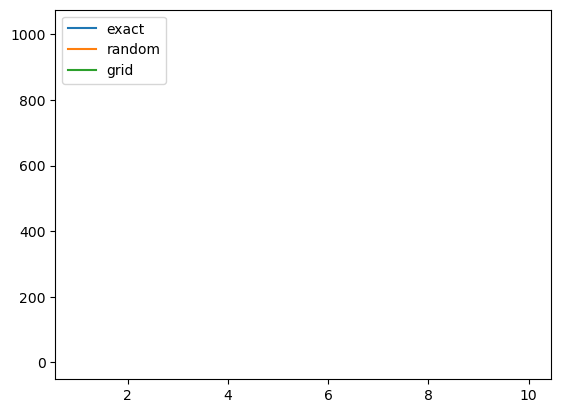

In [38]:
N = 1_000_000 # Python では整数に区切りが入れられる

# *** 実装しなさい ***
# n = 1, 2, ..., 10 について vol(Bn) の
# - 正確な値
# - 乱数を使った方法による近似値
# - 格子点を使った方法による近似値
# のグラフを描く
for n in range(1,11):
    plt.plot(n,exact_ball_vol(n))
    plt.plot(n,rand_ball_vol(n, N))
    plt.plot(n,grid_ball_vol(n,math.ceil(N**(1/n))))
# 凡例をつけるときは一番下の行をコメントアウト
# 凡例の順番は上で plot した順番と同じにする
plt.legend(["exact", "random", "grid"])

$n = 4$ 以降，格子点を使った方法では急速に精度が悪くなっていることが分かるだろう．

乱数を使う方法と正確な値のグラフはほぼ重なっていて，曲線は２本しか見えないかもしれない．$N = 10000$ 程度にして，かつ，正確な値と乱数を使う方法のグラフだけ表示する（格子点を使う方法は表示しない）と，誤差が見えるだろう．

さて，なぜ格子点を使う方法はこんなに精度が悪いのだろうか？

しばらく考えたら，以下のセルをクリックして，各次元 $n$ について，$\text{vol}(B_n)$ の正確値(e)，乱数による近似値(r)，格子点による近似値(g)とともに，格子点を作る際に区間 $[0, 1]$ をいくつに等分したか(K)を表示してみなさい．K の値を見れば，なぜ格子点を使った単純なやり方ではダメかが分かるだろう．

In [39]:
for n in range(2, 10+1):
    ns.append(n)
    e = exact_ball_vol(n)
    r = rand_ball_vol(n, N)
    K = math.ceil(N ** (1 / n))
    g = grid_ball_vol(n, K)
    print("n={:2d} e={:6.5f}, r={:6.5f}, g={:6.5f} (K = {:4d})".
          format(n, e, r, g, K))

n= 2 e=3.14159, r=3.14203, g=3.14554 (K = 1000)
n= 3 e=4.18879, r=4.18307, g=8.00000 (K =  100)
n= 4 e=4.93480, r=4.92182, g=16.00000 (K =   32)
n= 5 e=5.26379, r=5.26045, g=32.00000 (K =   16)
n= 6 e=5.16771, r=5.14451, g=64.00000 (K =   10)
n= 7 e=4.72477, r=4.70400, g=128.00000 (K =    8)
n= 8 e=4.05871, r=4.04070, g=256.00000 (K =    6)
n= 9 e=3.29851, r=3.33978, g=512.00000 (K =    5)
n=10 e=2.55016, r=2.57638, g=1024.00000 (K =    4)


---

お疲れ様でした．以上で今回の課題は全て終わりです．

## 課題提出の前の注意
* 必須課題の最後に移動し，メニューの "Cell" から <font color="red">"Run All Above"</font> を選択し，必須課題の全てのセルが正しく実行されることを確認すること
* 取り組んだチャレンジ課題のセルが全て正しく実行され，結果が表示されていることを確認すること
* 各セルの実行結果が表示されている状態で保存のボタンを押してノートブックを保存すること
* 上記のようにして，実行結果まで含めて保存してからノートブックを提出すること．

**初級編１：おわり**